In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

data = np.loadtxt('TD/data/fit_sinus.dat')
data_x = data[:,0]
data_y = data[:,1]

In [13]:
def frange(freq, freq0, Delta_f, amplitude, offset):
    return offset + amplitude*np.cos(2*np.pi*(freq-freq0)/Delta_f)

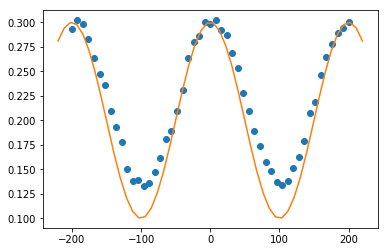

In [16]:
xplot = np.linspace(-220, 220)
p_ini = (0, 200, 0.1, 0.2)
plt.plot(data_x, data_y, 'o')
plt.plot(xplot, frange(xplot, *p_ini))

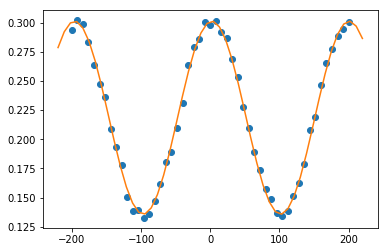

In [19]:
p_opt, cor_mat = curve_fit(frange, data_x, data_y, p_ini)
plt.plot(data_x, data_y, 'o')
plt.plot(xplot, frange(xplot, *p_opt))

In [21]:
freq0, Delta_f, amplitude, offset = p_opt
freq0

2.3676751760478263

In [22]:
cor_mat

array([[1.00116276e-01, 5.79061724e-04, 1.09866599e-06, 7.35862043e-07],
       [5.79061724e-04, 3.71813078e-01, 6.10915239e-05, 1.46820502e-04],
       [1.09866599e-06, 6.10915239e-05, 6.62971382e-07, 6.42446554e-09],
       [7.35862043e-07, 1.46820502e-04, 6.42446554e-09, 3.93151947e-07]])

In [23]:
sigma_freq0 = np.sqrt(cor_mat[0, 0])

In [24]:
sigma_freq0

0.31641156138612997

In [28]:
sigma = np.sqrt(np.diag(cor_mat))

In [30]:
cor_mat/ (sigma[:,np.newaxis]*sigma[np.newaxis, :])

array([[1.        , 0.00300131, 0.00426448, 0.00370906],
       [0.00300131, 1.        , 0.12304706, 0.38401144],
       [0.00426448, 0.12304706, 1.        , 0.01258373],
       [0.00370906, 0.38401144, 0.01258373, 1.        ]])

## Corrélation en paramètres

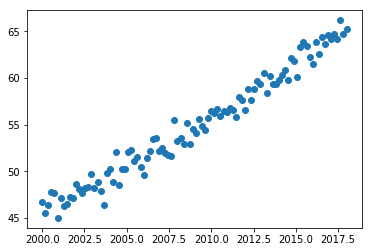

In [31]:
np.random.seed(0)
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)

plt.plot(x, y, 'o')

In [38]:
def fit_function(x, a, b):
    return a*x + b

p_opt, cor_mat = curve_fit(fit_function, x, y)
a, b = p_opt
p_opt

array([ 1.08348182e+00, -2.12175517e+03])

In [39]:
sigma = np.sqrt(np.diag(cor_mat))
sigma

array([1.93267668e-02, 3.88276066e+01])

In [40]:
cor_mat/ (sigma[:,np.newaxis]*sigma[np.newaxis, :])

array([[ 1.        , -0.99999659],
       [-0.99999659,  1.        ]])

In [41]:
sigma_a = sigma[0]
sigma_b = sigma[1]

x_test = 2010

In [42]:
a*x_test + b

56.04328983428377

In [46]:
sigma_y = np.sqrt(x_test**2 * sigma_a**2 + sigma_b**2)
sigma_y

54.924102159729976

In [47]:
sigma_y = np.sqrt(x_test**2 * sigma_a**2 + sigma_b**2 + 2*x_test*cor_mat[1, 0])
sigma_y

0.10325902606783537